In [1]:
pip freeze > requirements_lr.txt

Note: you may need to restart the kernel to use updated packages.


Importing the Required Dependencies

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from sklearn.model_selection import RepeatedKFold

Reading the Dataset

In [5]:
dataset = pd.read_csv("dataset.csv")

In [6]:
dataset.head()

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                      4.0           Bag Stuffers   
1                   2.5944                      3.0  Cash Register Lottery   
2                   1.3616                      2.0    High Roller Savings   
3                   1.1776                      2.0  Cash Register Lottery   
4                   1.4280                      3.0       Double Down Sale   

  sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
0           USA              M      F  ...       18670.0      5415.0   
1           USA              M      M  ...       18670.0      5415.0   
2           USA              S      F  ...       18670.0      5415.0   
3           USA              M      F  ...       18670.0      5415.0   
4           USA              M      M  ...       18670.0      5415.0   

  meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
0    3610.0        1.0         1.0        1.0           1.0      1.0   
1    3610.0        1.0         1.0        1.0           1.0      1.0   
2    3610.0        1.0         1.0        1.0           1.0      1.0   
3    3610.0        1.0         1.0        1.0           1.0      1.0   
4    3610.0        1.0         1.0        1.0           1.0      1.0   

           media_type    cost  
0  Daily Paper, Radio  126.62  
1  Daily Paper, Radio   59.86  
2  Daily Paper, Radio   84.16  
3     In-Store Coupon   95.78  
4               Radio   50.79  

[5 rows x 40 columns]

Function to scale the data values

In [7]:
def data_scaler(x1,x2,y1,y2):
    X_train = x1
    X_test = x2
    y_train = y1
    y_test = y2
    X_scale = MinMaxScaler().fit(X_train) #finding min and max values
    X_train_trans = X_scale.transform(X_train) # scaling values based on min and max values
    X_train = pd.DataFrame(X_train_trans) # convert matrix to data frame with columns

    y_scale = MinMaxScaler().fit(np.array(y_train).reshape(-1, 1))
    y_train = y_scale.transform(np.array(y_train).reshape(-1, 1))

    # Scaling the test set using the X and y scalers
    X_test_trans = X_scale.transform(X_test)
    X_test = pd.DataFrame(X_test_trans)
    y_test = y_scale.transform(np.array(y_test).reshape(-1, 1))
    y_test = y_test.flatten()
    return X_train,X_test,y_train,y_test

Linear Regression with Stochastic Gradient Descent

In [8]:
def sgd(X,y,theta,iteration,alpha,m,n):
    cost = [] # list to store cost value of each iteration
    theta_new = [] # list to store theta values of a particular iteration
    for i in range(0, iteration):
        pred = np.matmul(X,theta) # Compute the predicted value
        J = 1/2 * ((np.square(pred - y)).mean()) # Calculate cost function
   
        j = 0 # iteration for theta values
    
        # Update the theta values for all the features with the gradient of the cost function
        for j in range(0,n): 
            t = round(theta[j] - alpha/m * sum((pred-y)*X[:,j]),4) # calculate new theta value
            theta_new.append(t) # save new theta values in a temporary array
        
        # update theta array
        theta = [] # empty the theta array
        theta = theta_new # assign new values of theta to array
        theta_new = [] # empty temporary array
        cost.append(J) # append cost function to the cost array
    return theta,cost

Define function to compute values of evaluation metrics chosen

In [9]:
def eval_metrics(y_test,y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred) #computes mean absolute error
    mse = metrics.mean_squared_error(y_test, y_pred) #computes mean square error
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #computes root mean square error
    r2 = metrics.r2_score(y_test, y_pred) #computes r2 score
    return mae,mse,rmse,r2

Function to plot Cost Function vs Iterations

In [10]:
def plotting(cost):
    cost_history = cost
    plt.figure(figsize=(10,8))
    plt.plot(cost_history)
    plt.title('Cost Function')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function Value')
    None

Feature Representation 1: Complete Dataset (Pre-processed)

In [27]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(dataset.drop(columns=['cost'])) #convert non-numeric values to numeric values and drop 'cost'
y = dataset['cost']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [28]:
X_train,X_test,y_train,y_test = data_scaler(X_train,X_test,y_train,y_test)
X_train = np.column_stack(([1]*X_train.shape[0], X_train))# add a column with ones for the bias value while converting it into a matrix
X_test = np.column_stack(([1]*X_test.shape[0], X_test))
m,n = X_train.shape  
theta = np.array([1] * n) # initial theta
X = np.array(X_train) # convert X_train into a numpy matrix
y = y_train.flatten() # convert y into an array

alpha = 0.001 # alpha value 
iteration = 1000 # iterations

In [13]:
final_theta,cost_history = sgd(X,y,theta,iteration,alpha,m,n) #training the model using complete dataset

In [14]:
cost_history[-1]

0.12220935662709342

In [15]:
X_test = np.array(X_test)
y_pred = np.matmul(X_test,final_theta) # predicting cost using learned theta

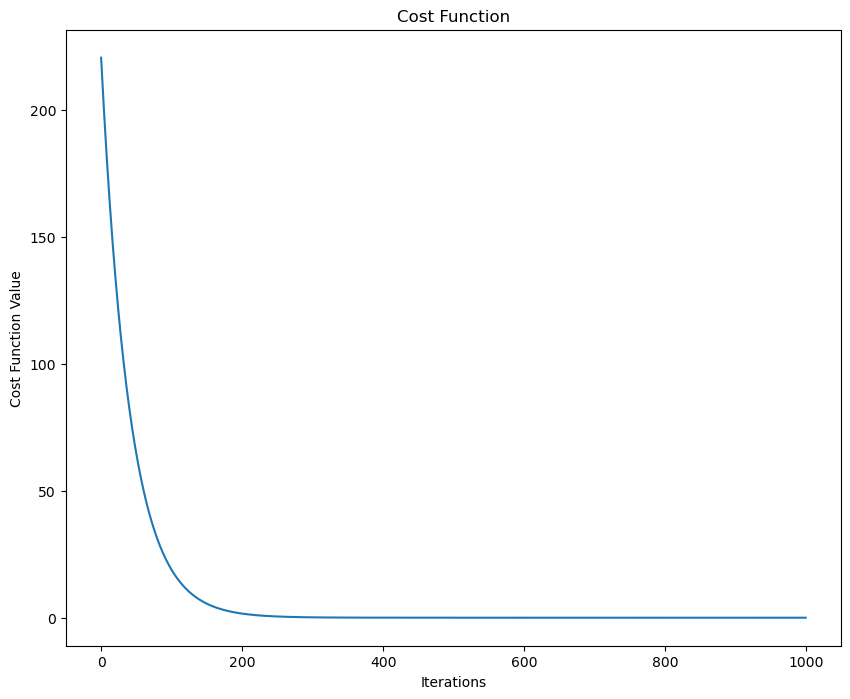

In [16]:
plotting(cost_history)

In [17]:
mae,mse,rmse,r2 = eval_metrics(y_test,y_pred)
print('MAE on Test set :',mae)
print('MSE on Test set :',mse)
print('RMSE on Test set :',rmse)
print('R2 Score on Test set :',r2)

MAE on Test set : 0.39725908531703363
MSE on Test set : 0.24424519816925205
RMSE on Test set : 0.4942116936791885
R2 Score on Test set : -1.6519570009495737


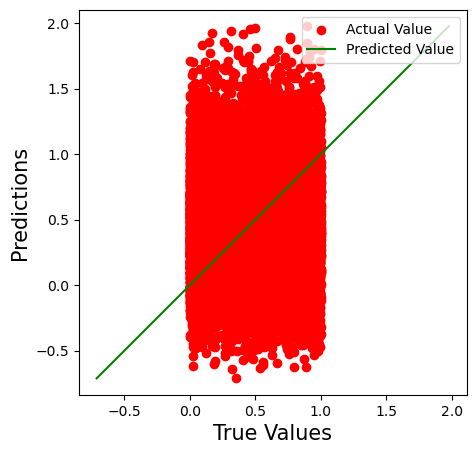

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='red')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'green')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.legend(['Actual Value', 'Predicted Value'])
plt.axis('equal')
plt.show()

Feature Representation 2 : PCA

In [15]:
X_pca = encoder.fit_transform(dataset.drop(columns=['cost']))
y_pca = dataset['cost']
matrix_pca = np.column_stack((X_pca,y_pca))

In [16]:
norm_matrix_pca = normalize(matrix_pca) #normalizing values in original dataset

In [17]:
pca = PCA(n_components = 0.95,svd_solver = 'full')
data_reduced = pca.fit_transform(scale(norm_matrix_pca)) #running pca on complete dataset

In [18]:
y_pca = data_reduced[:, -1]
X_pca = data_reduced[:, :-1] #Separating features and target variable
X_pca = np.column_stack(([1]*X_pca.shape[0], X_pca))
m,n = X_pca.shape # rows and columns 
theta_pca = np.array([1] * n) # initial theta

In [19]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_pca, test_size=0.30) #creating train and test splits

In [20]:
final_theta_pca,cost_history_pca = sgd(X_train_pca,y_train_pca,theta_pca,iteration,alpha,m,n) #learning theta values for feature representation 2

In [21]:
X_test_pca = np.array(X_test_pca)
y_pred_pca = np.matmul(X_test_pca,final_theta_pca) #prdicting cost using learned theta

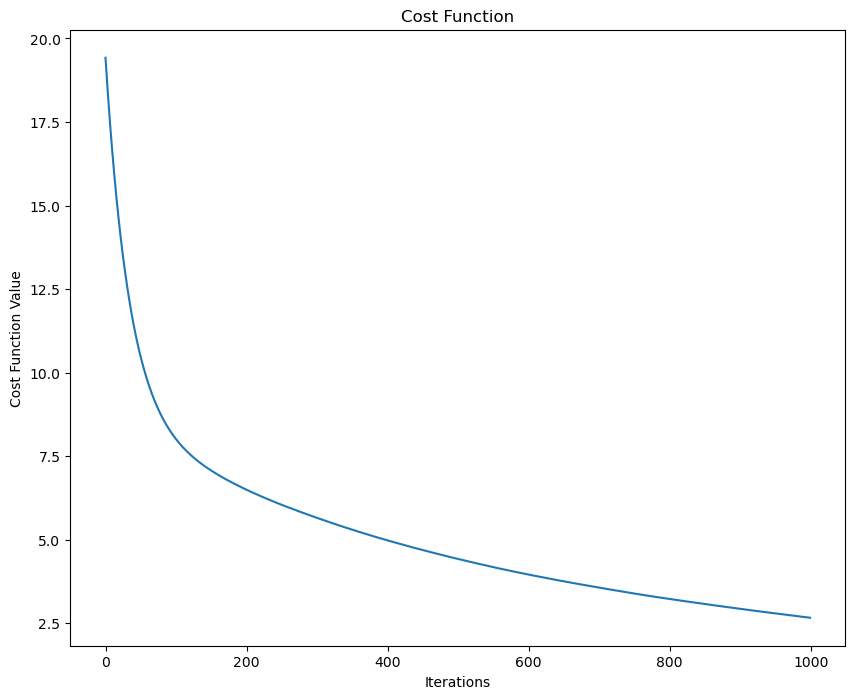

In [22]:
plotting(cost_history_pca)

In [23]:
mae,mse,rmse,r2 = eval_metrics(y_test_pca,y_pred_pca)
print('MAE on Test set :',mae)
print('MSE on Test set :',mse)
print('RMSE on Test set :',rmse)
print('R2 Score on Test set :',r2)

MAE on Test set : 1.4078036680611103
MSE on Test set : 5.482503446357586
RMSE on Test set : 2.3414746307311525
R2 Score on Test set : -16.57955797541343


Feature Representation 3: t-SNE

In [93]:
X_tsne = encoder.fit_transform(dataset.drop(columns=['cost']))
y_tsne = dataset['cost']
matrix_tsne = np.column_stack((X_tsne,y_tsne))

In [94]:
norm_matrix_tsne = normalize(matrix_tsne) #normalizing the original dataset

In [95]:
fashion_tsne = TSNE(random_state=None,init='random',learning_rate='auto').fit_transform(norm_matrix_tsne) #running t-sne on normalized dataset

In [96]:
y_tsne = fashion_tsne[:, -1]
X_tsne = fashion_tsne[:, :-1] #splitting features from target variable
X_tsne = np.column_stack(([1]*X_tsne.shape[0], X_tsne))
m,n = X_tsne.shape # rows and columns 
theta_tsne = np.array([1] * n) # initial theta

In [97]:
X_train_tsne,X_test_tsne,y_train_tsne,y_test_tsne = train_test_split(X_tsne,y_tsne, test_size=0.30) #splitting data into train and test sets

In [98]:
final_theta_tsne,cost_history_tsne = sgd(X_train_tsne,y_train_tsne,theta_tsne,iteration,alpha,m,n) #learning theta values for feature representation 3

In [99]:
X_test_tsne = np.array(X_test_tsne)
y_pred_tsne = np.matmul(X_test_tsne,final_theta_tsne) #predicting cost using learned theta

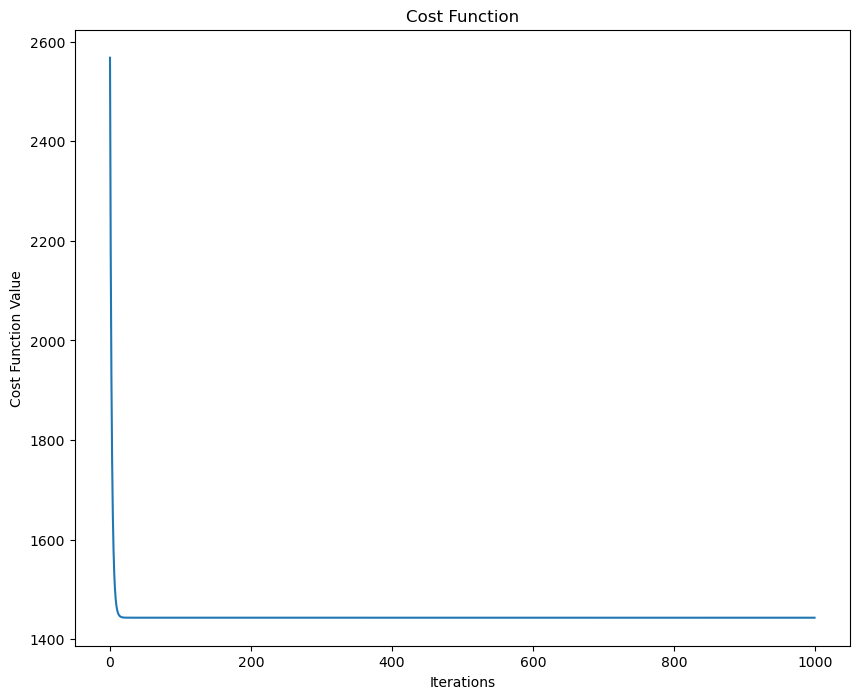

In [100]:
plotting(cost_history_tsne)

In [101]:
mae,mse,rmse,r2 = eval_metrics(y_test_pca,y_pred_pca)
print('MAE on Test set :',mae)
print('MSE on Test set :',mse)
print('RMSE on Test set :',rmse)
print('R2 Score on Test set :',r2)

MAE on Test set : 1.4078036680611103
MSE on Test set : 5.482503446357586
RMSE on Test set : 2.3414746307311525
R2 Score on Test set : -16.57955797541343


Plotting graphs to visualize categorical values

store_sales(in millions) :
[ 7.36  5.52  3.68 ... 16.1   0.58  1.21]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


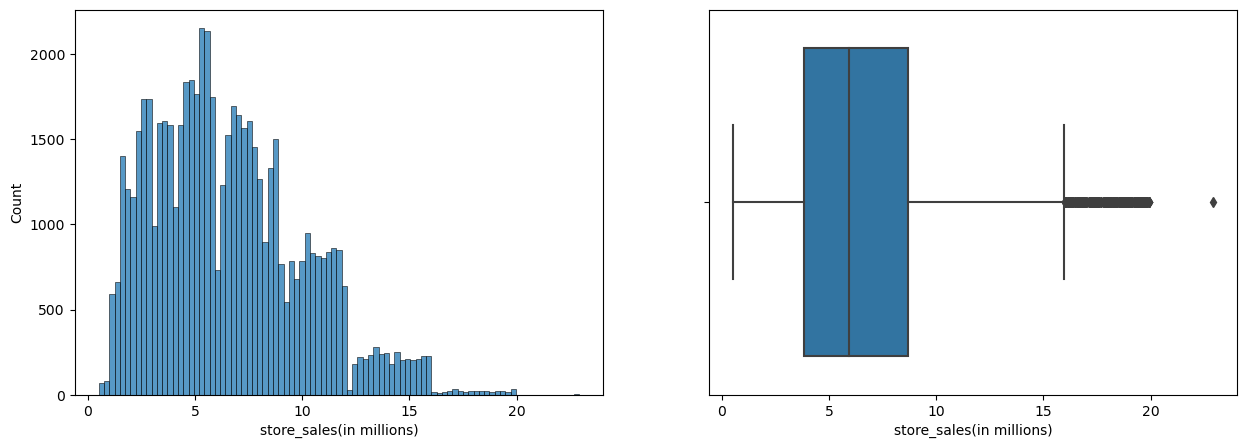

store_cost(in millions) :
[2.7232 2.5944 1.3616 ... 0.2842 4.715  0.4477]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


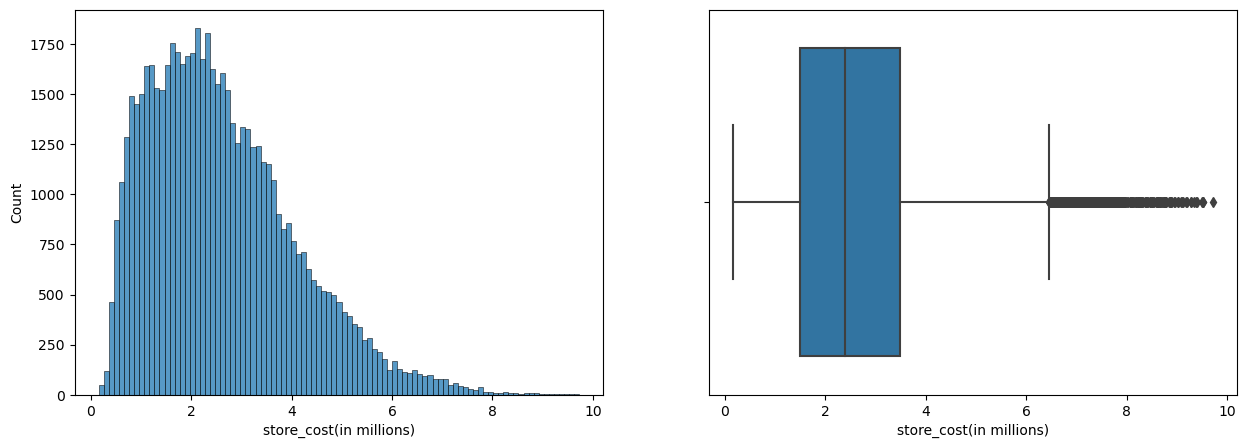

unit_sales(in millions) :
[4. 3. 2. 5. 6. 1.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


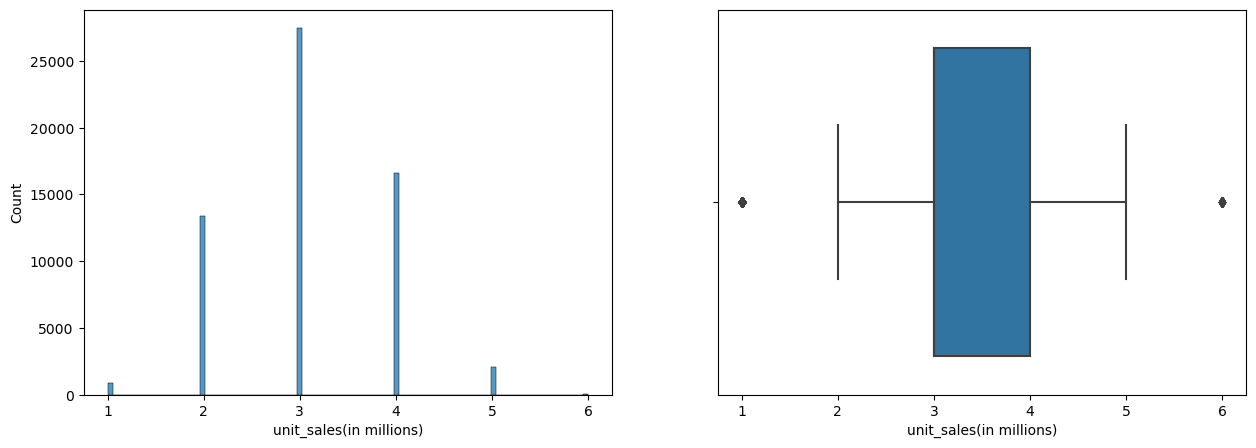

total_children :
[1. 0. 4. 2. 3. 5.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


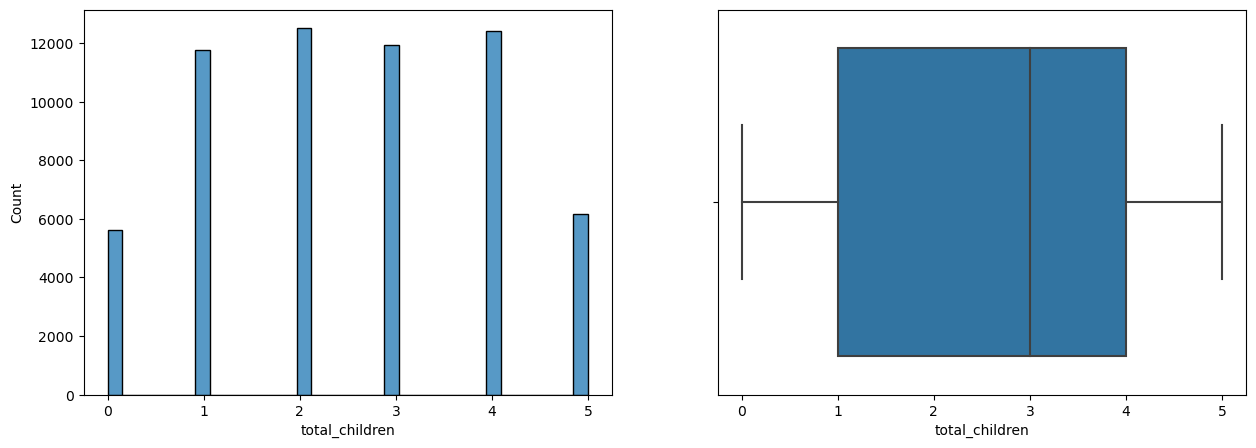

avg_cars_at home(approx) :
[1. 4. 2. 3. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


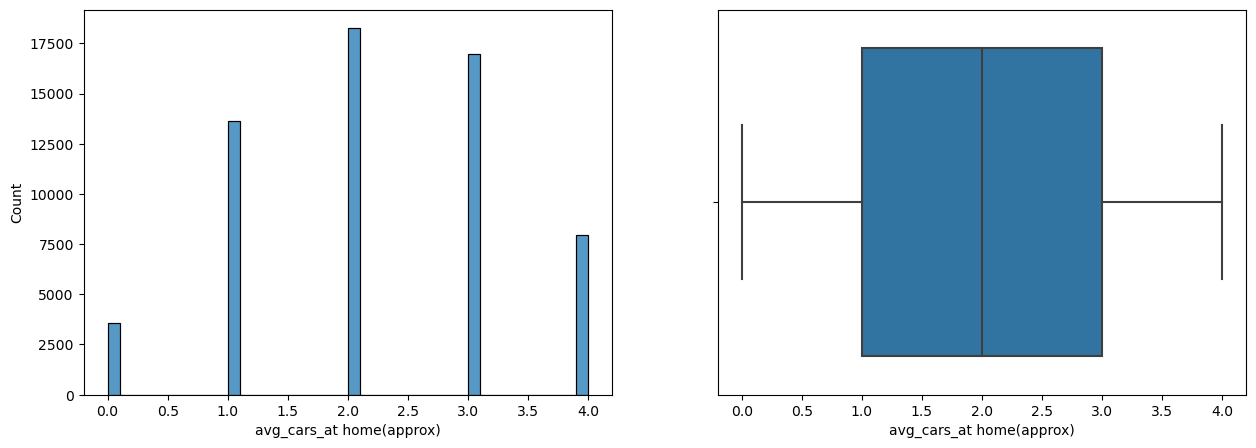

num_children_at_home :
[1. 0. 2. 3. 5. 4.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


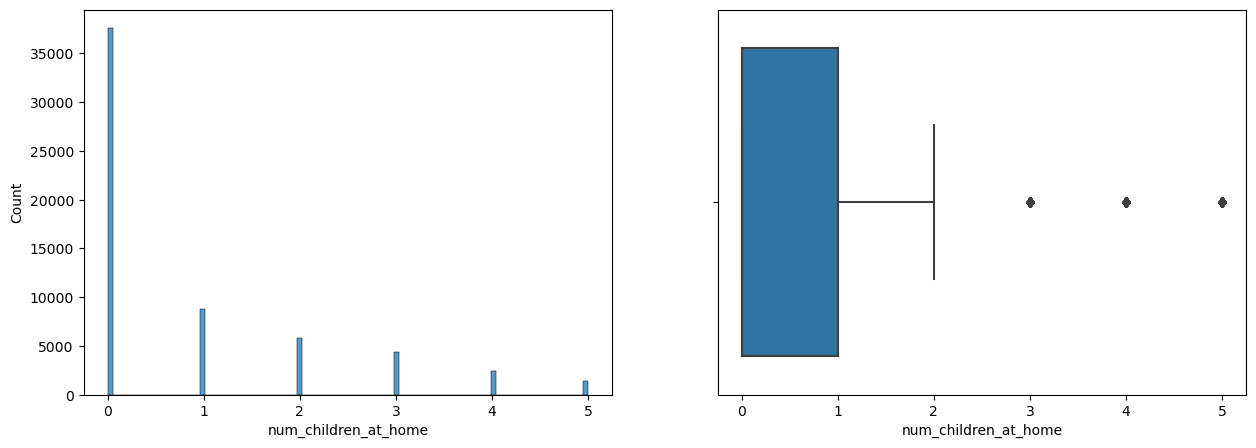

avg_cars_at home(approx).1 :
[1. 4. 2. 3. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


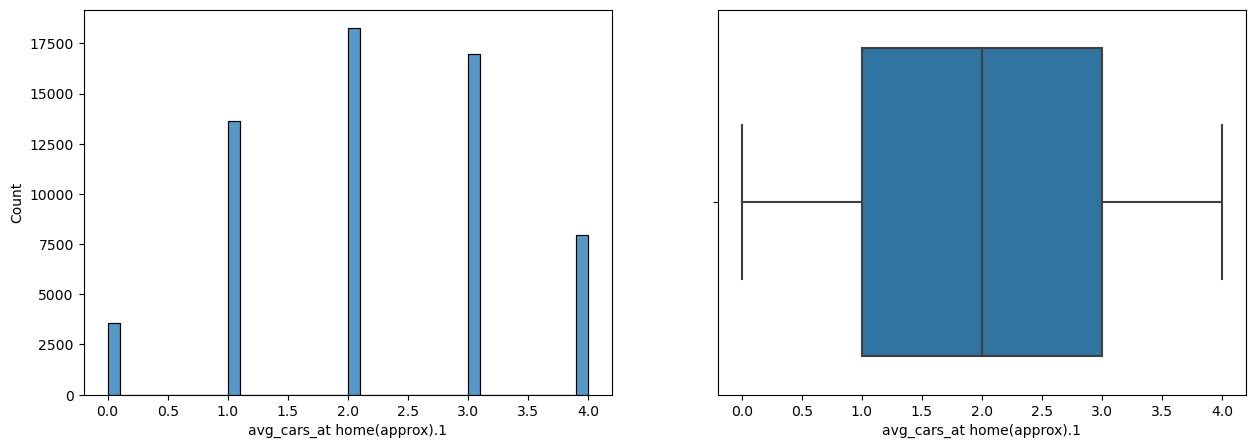

SRP :
[1.84 1.36 1.87 3.24 1.64 2.99 3.27 0.93 1.32 1.56 1.26 2.93 0.97 3.74
 1.42 1.95 3.86 0.51 0.53 3.93 2.18 1.55 2.52 2.86 2.77 2.17 2.3  3.11
 1.13 2.97 2.14 1.81 1.23 0.77 2.73 2.48 1.35 1.49 1.3  0.58 1.54 2.22
 3.52 1.39 2.95 2.36 2.87 1.16 1.96 2.62 0.63 2.75 1.31 2.65 2.88 2.19
 3.64 3.91 2.5  1.2  1.71 0.57 1.34 3.87 1.8  0.92 0.73 2.96 1.77 2.27
 2.61 2.84 2.4  3.17 0.69 3.36 2.83 0.81 1.66 0.55 2.89 2.82 2.21 2.55
 2.71 3.34 1.17 3.85 3.42 2.58 2.41 2.43 0.96 3.51 3.58 2.53 2.63 3.4
 3.45 1.33 0.74 2.6  2.8  0.67 1.73 2.23 1.74 1.52 1.45 1.57 1.43 1.86
 2.81 2.66 1.93 1.14 2.64 0.78 1.37 1.5  2.37 1.83 3.26 2.72 3.32 1.41
 1.94 1.24 1.65 0.84 1.22 2.59 2.85 1.28 3.13 0.88 3.88 2.9  2.94 1.67
 2.45 1.47 2.25 1.59 3.43 0.66 1.58 0.9  2.35 1.25 0.56 0.64 0.98 2.98
 0.89 2.49 2.1  1.78 3.44 2.12 1.68 1.79 2.44 3.21 0.8  3.14 3.78 3.48
 1.4  0.76 2.54 2.79 1.97 2.2  1.88 0.86 2.11 2.7  3.96 0.59 3.25 3.46
 3.29 2.47 3.75 0.72 3.18 2.51 3.59 2.74 0.94 1.82 3.38 2.57 3.61 3.12
 

C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


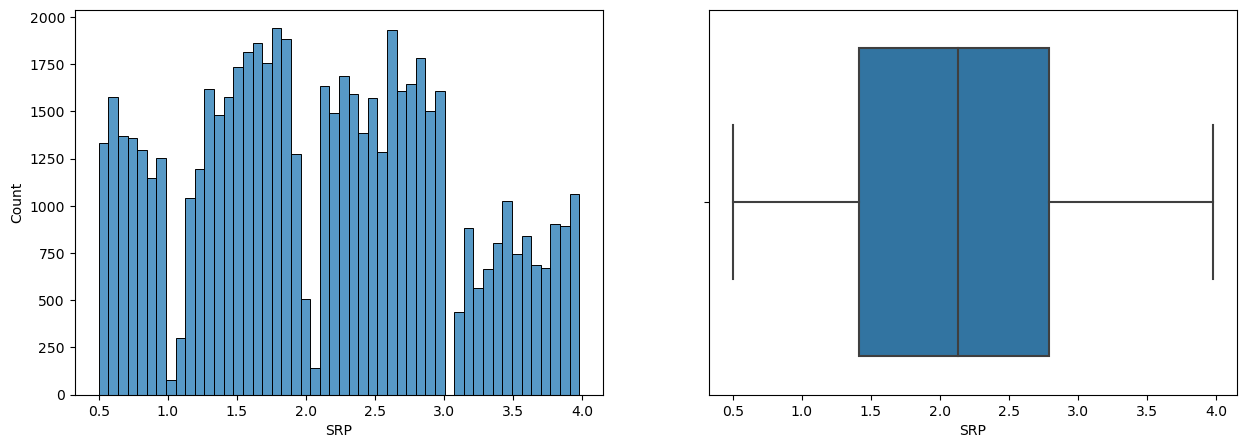

gross_weight :
[19.7   7.12 16.7  16.3  14.1  13.5  17.4  13.6  17.8  21.9  10.3  18.9
  9.8  12.    8.5   7.71 10.1   6.2  11.7   8.16 15.5   8.08 10.6  21.4
  8.86 16.   10.8   8.55 13.9   7.95 15.9   7.64 10.9  16.5  13.4  17.5
 20.4  15.4  16.1  21.7  14.5   7.27  9.24  8.7  21.2  12.6  17.1  14.
  8.17 12.8   8.85 14.6  16.9   8.35 18.3  17.2   6.66  7.26  9.55  8.22
 13.8  18.7  20.9  20.3  12.1  17.6  20.8   7.06  7.66 12.3  20.    6.63
 10.5  19.2   8.68  9.75  7.48  9.05 11.9   9.22  6.82 13.7  20.6  14.7
 16.4  18.8  21.6  19.6  19.9  16.2   8.51 19.5  15.2   8.1  12.7  17.3
 11.3  10.7  19.4   9.09  6.29 15.6  13.1  14.3  12.4  17.    9.02 14.8
  7.43 17.9   8.33  9.99  9.71 11.5  20.1  21.1  13.   11.2   9.3   7.96
  9.77  8.02 15.3  10.4  12.2   9.35 18.   12.5  19.3   9.49  8.25 20.2
 18.2  19.1  18.4  21.8  11.6   8.65  7.11  7.18 11.1  14.4  18.6   9.9
 15.    8.32  9.01  7.87  9.79  9.63 15.7   6.6   7.29  6.78  8.89  8.42
  8.71  6.3   6.94  7.91  6.33  9.58 13.3   9.

C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


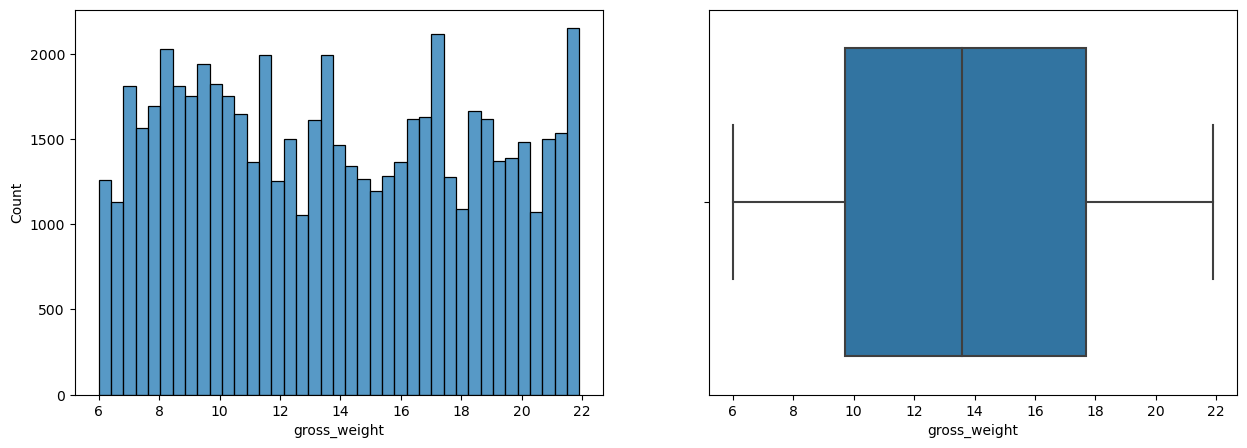

net_weight :
[17.7   5.11 14.7  14.2  13.1  11.5  14.3  11.6  15.7  19.8   9.3  16.8
  8.8  10.    7.5   5.71  7.1   5.19  8.69  6.15 13.5   5.07  8.6  18.3
  6.85 14.    7.8   6.55 12.8   6.94 13.8   5.63  7.89 14.5  10.3  14.1
 19.7  12.5   4.26  7.23 19.3   7.69 18.2  20.2   9.6  15.1  11.    6.17
 11.8   5.85 18.7  13.6   6.35 17.2  16.2  15.2   4.65  6.26 11.3   8.3
  7.22 16.7  17.8  19.2  10.1  15.6   5.05  5.65 18.    8.5   6.68  7.75
  4.48  6.05 10.8  18.8   6.22  4.82 10.6  19.6  13.3  20.6  18.6   6.51
 16.5   6.1  12.1  15.3  17.3   6.09  5.28 14.6  20.3  20.8   6.02  5.42
  9.89 14.8   6.32  7.98  8.71  9.5  18.1  20.1   7.3   4.96  7.77 15.
 12.6   7.39  9.19  7.35 17.   10.5   8.48  7.25 16.1  15.8   8.39  6.64
 20.7  17.6   6.11  6.71  8.1  12.3  16.6   6.89 13.    6.31  6.01  6.86
  8.78  7.63 12.    3.59  4.28  4.78 19.1   9.    6.8   5.3   3.94  6.9
  4.32  7.57  7.94  5.4   9.8   3.3  11.1   8.    6.43  9.69  4.21  5.96
 13.7   6.18 18.5   9.1  17.5   3.09  5.23  7

C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


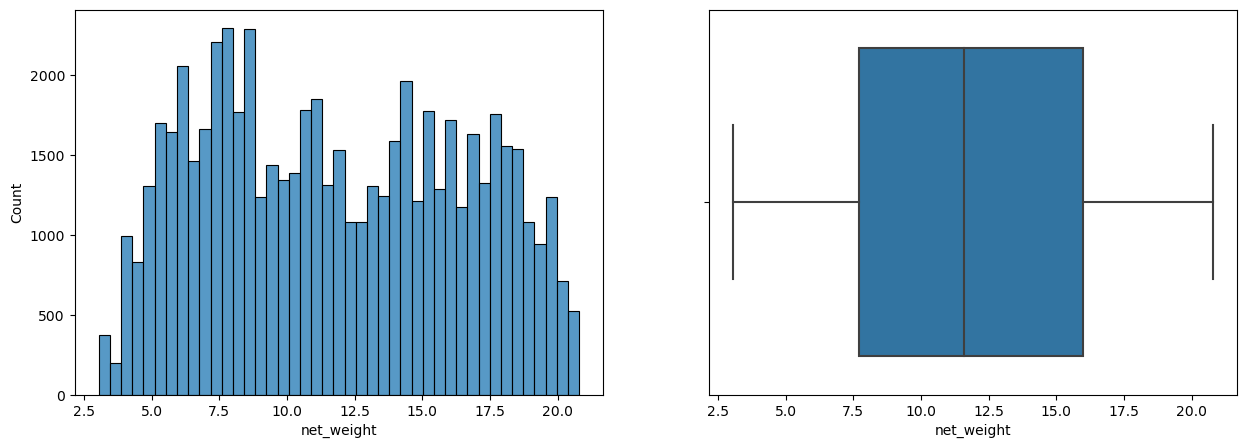

recyclable_package :
[1. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


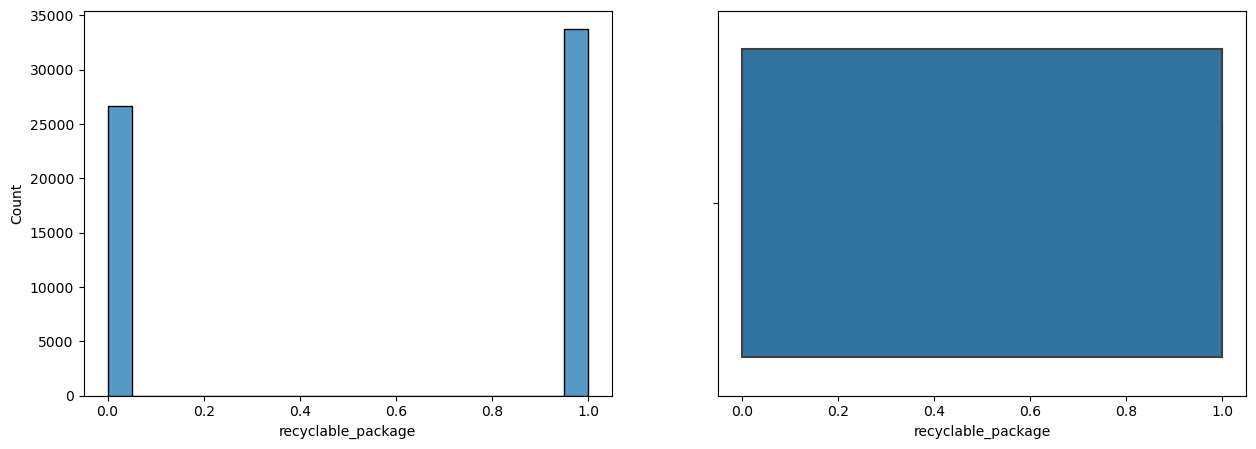

low_fat :
[0. 1.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


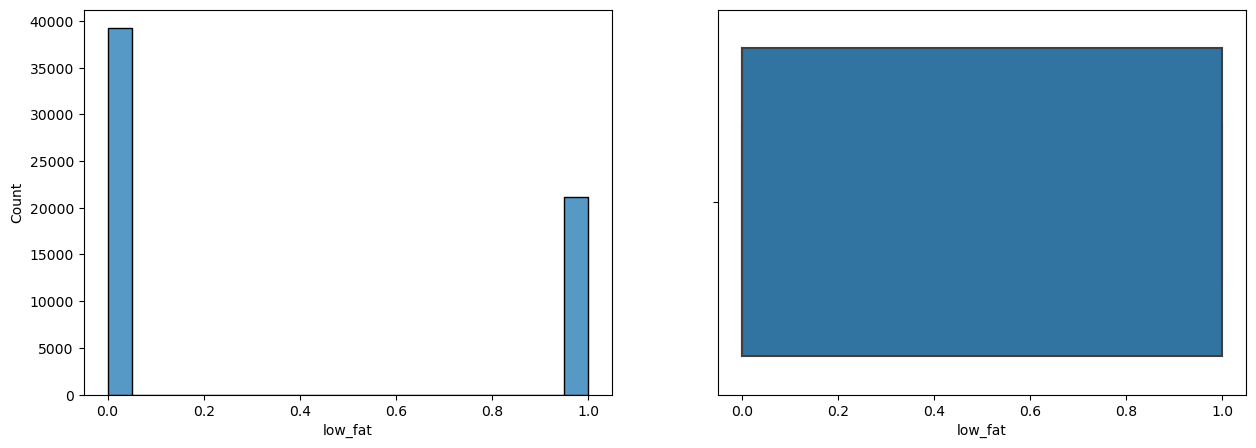

units_per_case :
[17. 29. 10. 25. 23. 35. 30. 31. 18. 26. 21.  2. 11.  6. 33. 13.  4.  3.
  5. 15. 19. 32.  8. 22.  7. 27. 14.  1. 12. 28. 16. 36. 34. 20.  9. 24.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


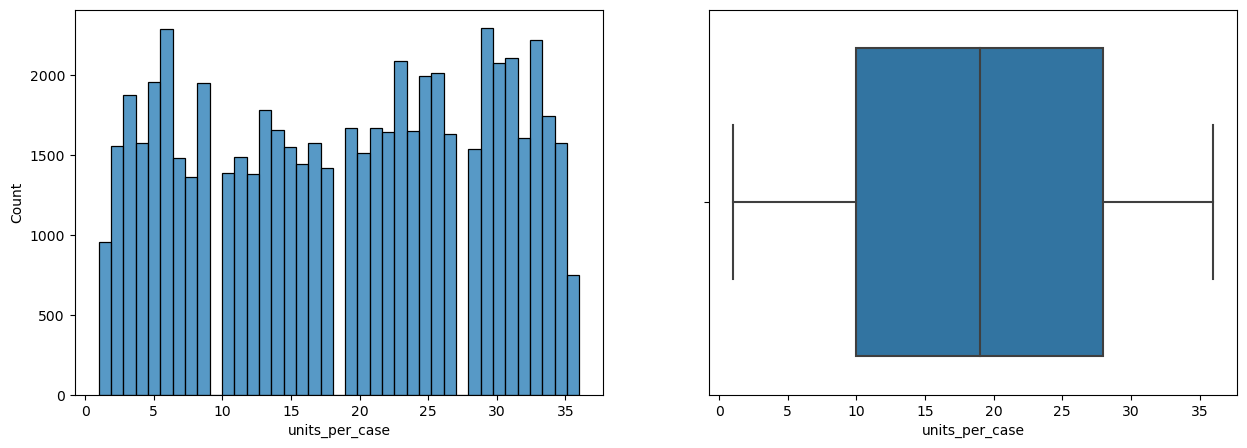

store_sqft :
[27694. 33858. 21215. 30268. 23598. 23688. 20319. 28206. 34791. 30797.
 38382. 30584. 36509. 23112. 39696. 23759. 24597. 23593. 22478. 34452.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


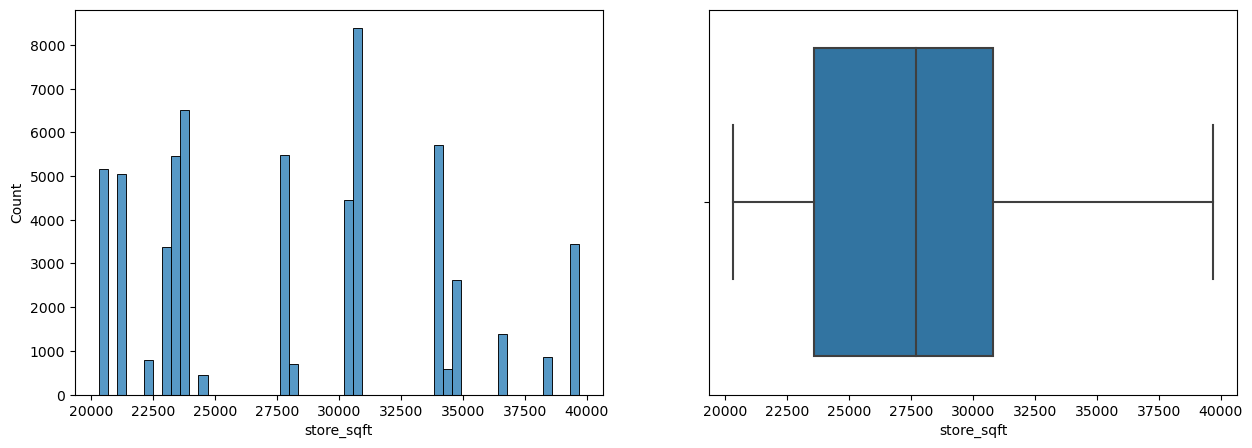

grocery_sqft :
[18670. 22123. 13305. 22063. 14210. 15337. 16232. 22271. 26354. 20141.
 30351. 21938. 22450. 16418. 24390. 16844. 15012. 17475. 15321. 27463.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


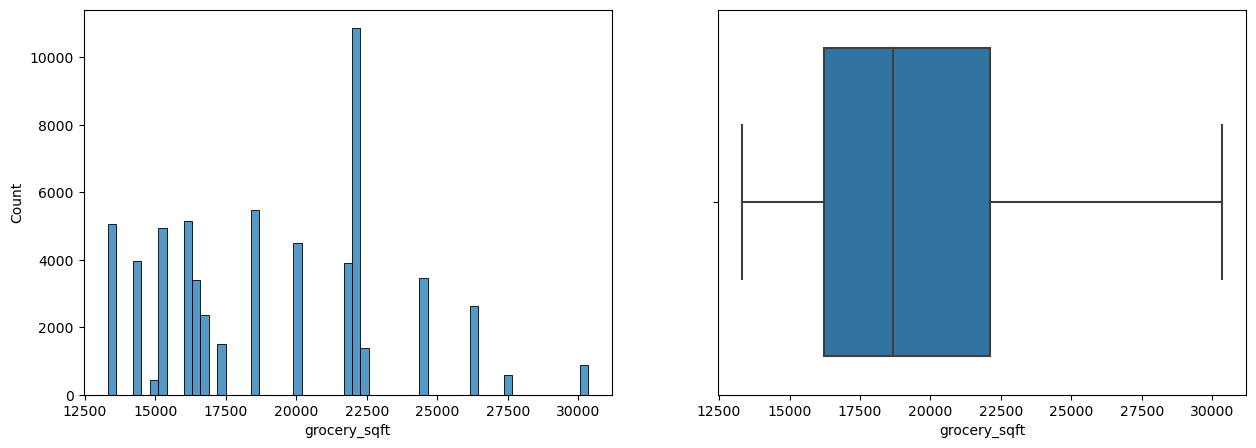

frozen_sqft :
[5415. 7041. 4746. 4923. 5633. 5011. 2452. 3561. 5062. 6393. 4819. 5188.
 8435. 4016. 9184. 4149. 5751. 3671. 4294. 4193.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


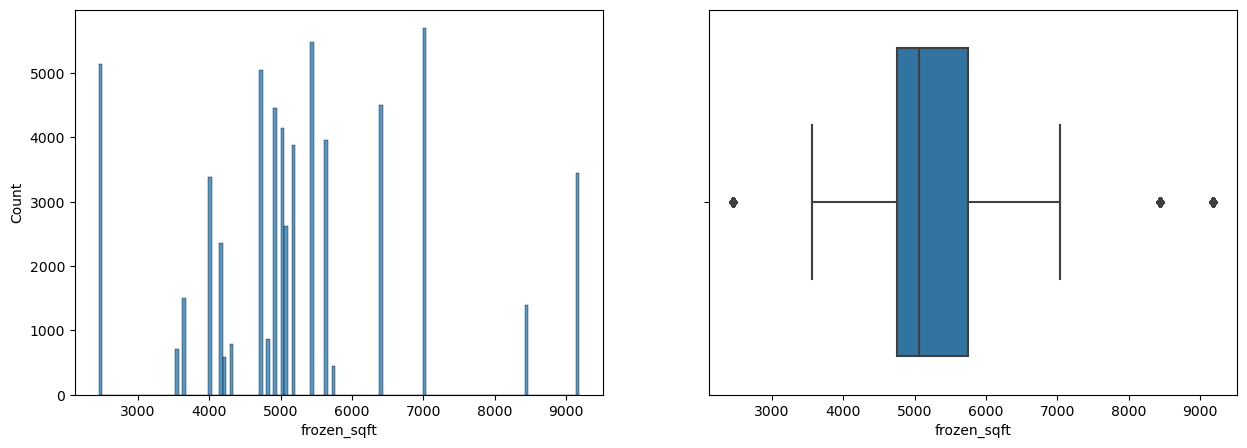

meat_sqft :
[3610. 4694. 3164. 3282. 3755. 3340. 1635. 2374. 3375. 4262. 3213. 3458.
 5624. 2678. 6122. 2766. 3834. 2447. 2863. 2795.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


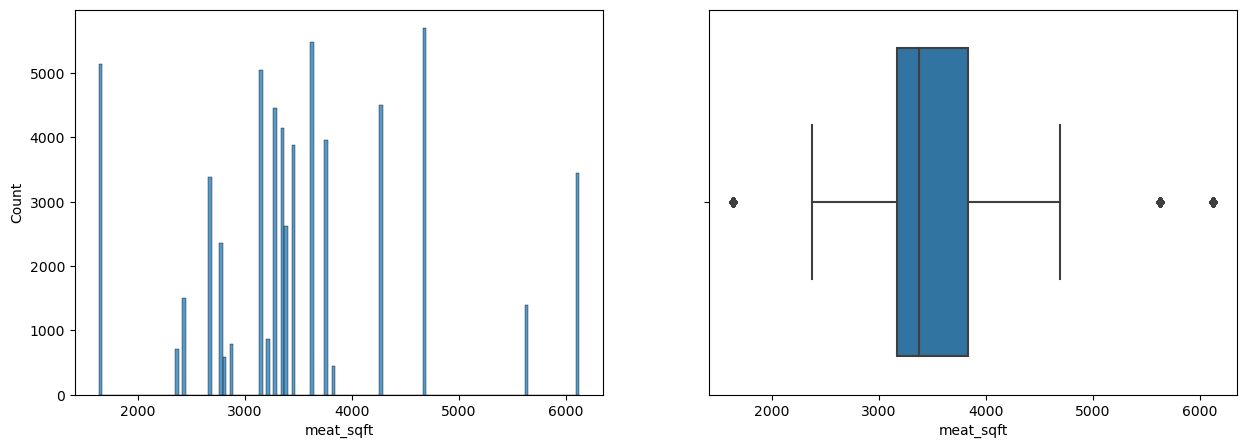

coffee_bar :
[1. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


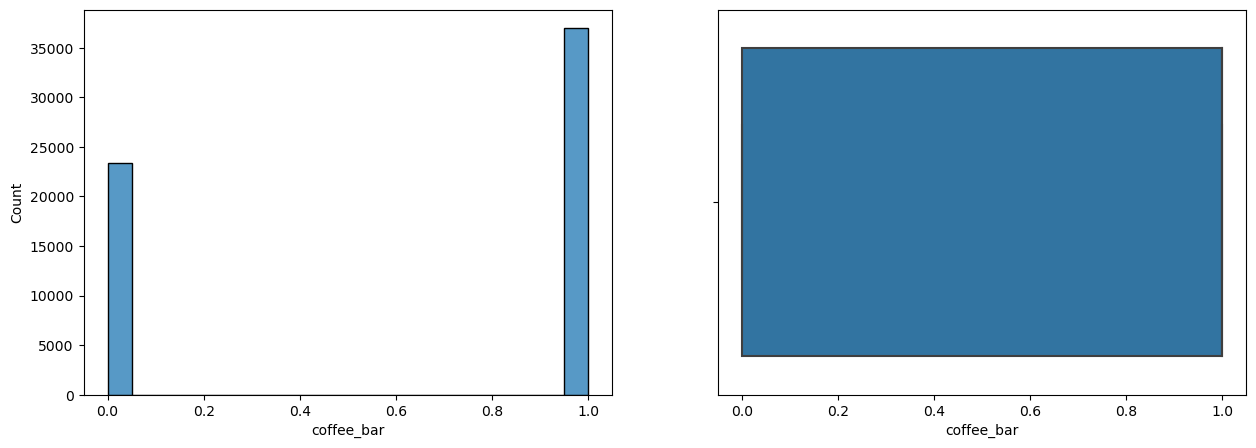

video_store :
[1. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


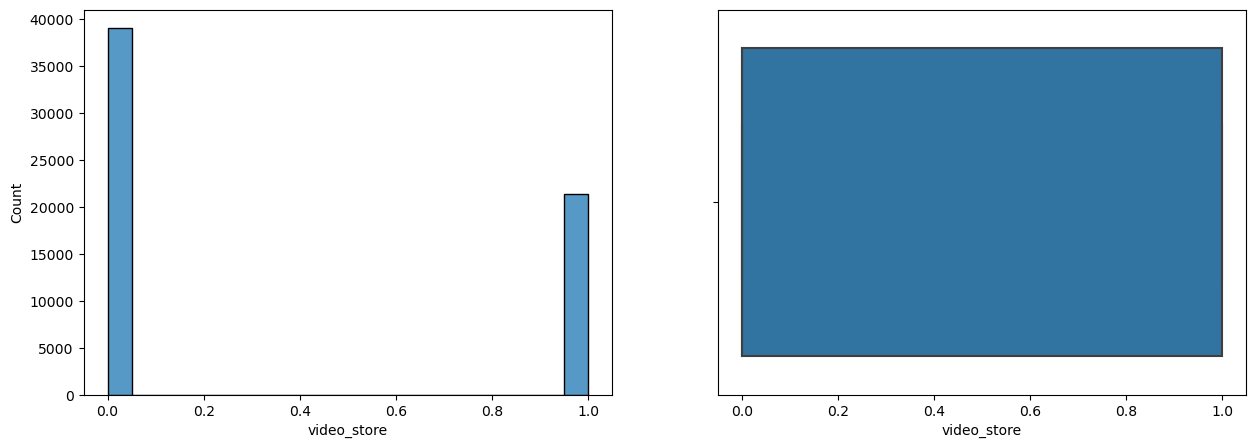

salad_bar :
[1. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


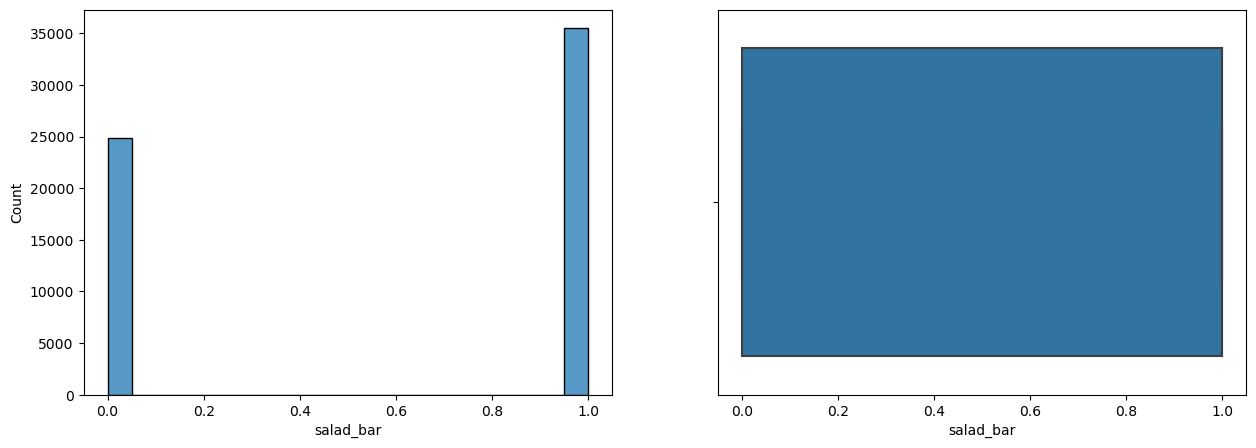

prepared_food :
[1. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


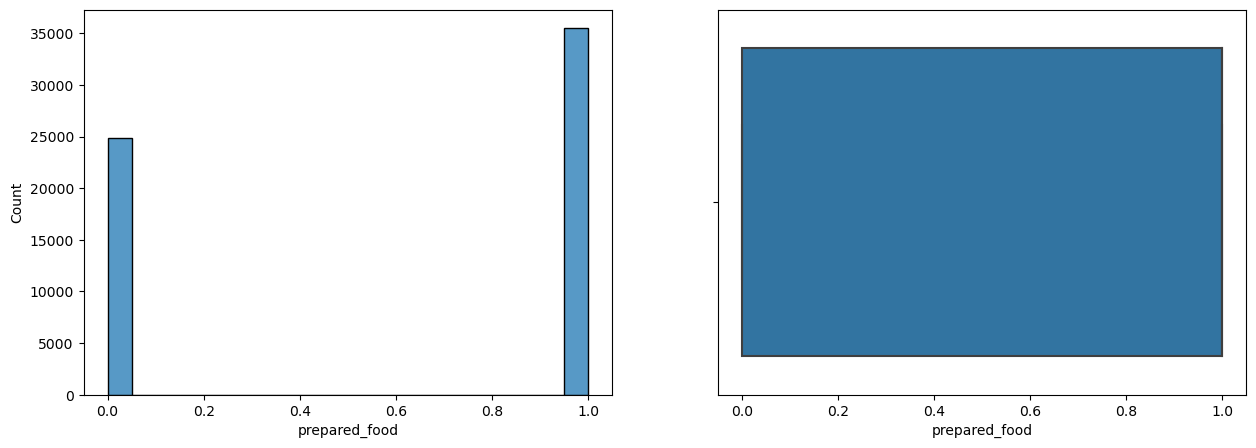

florist :
[1. 0.]


C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


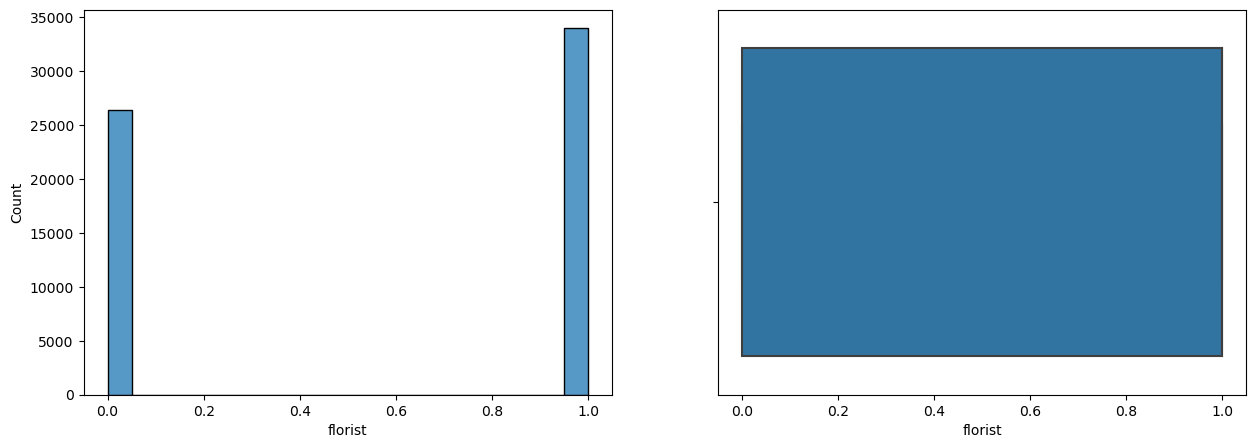

cost :
[126.62  59.86  84.16  95.78  50.79  66.27  82.62  53.45  80.29  54.11
 138.81 103.65  69.65  73.05 136.74 149.08  51.12 115.13 109.06  95.74
 138.53  66.78  69.63 123.88  76.98 135.8   91.28 138.23  80.    99.77
  59.19 116.74  97.45  64.99 100.91  79.95  89.37 136.57  62.26  62.67
  57.52 146.41 128.2   68.97 107.89  53.37  58.16 143.04  81.79  85.88
 137.46 137.34 149.75 117.86  67.11 101.84 126.88  96.55  55.96 108.22
  52.06 140.57 137.7   72.61 117.4   62.27 145.6  139.19  90.58 114.98
 109.03  95.98 144.31  62.12 125.48 129.38 116.4  110.56  98.81  76.88
  83.55  99.38  92.57  62.4   91.58 148.62 123.63 146.72  87.07  86.79
 135.54 105.28  94.79 139.25 125.83 104.41  96.18 137.17  75.22  51.
  95.45 102.47 144.54 107.2  142.71  60.87 138.18  97.13 122.77  77.24
  53.21 109.21 106.1  123.02  51.27 129.5   58.27 115.05  82.61 145.52
  90.65 147.82 110.5   73.92 112.19  55.22  84.97 130.06 144.38  69.47
  55.59  54.9   91.   111.7   70.32  67.31  59.83  71.51 142.58  94.63
 

C:\Program Files\ Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


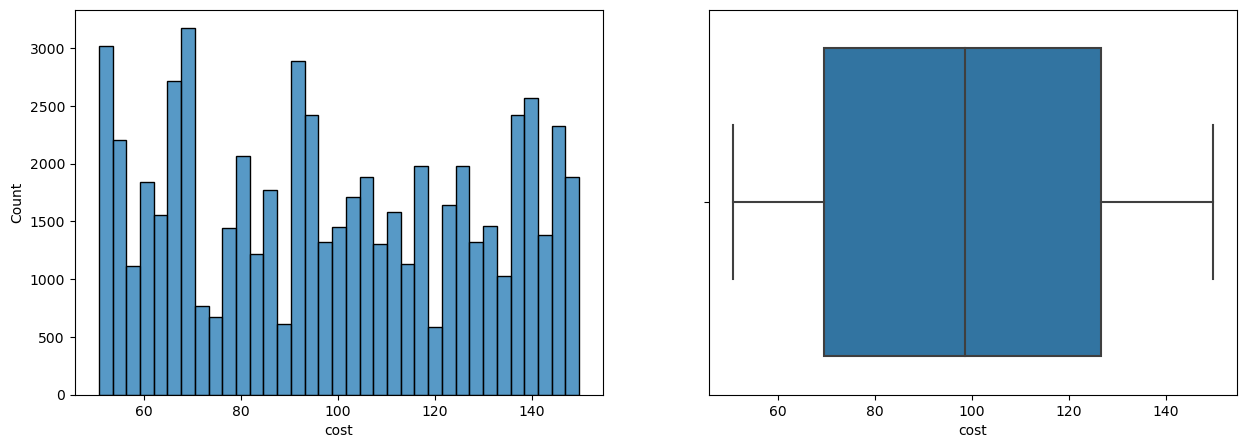

In [33]:
for col in dataset.select_dtypes('float').columns:
    print(col+" :")
    print(dataset[col].unique())
    fig, axes = plt.subplots(1, 2,figsize=(15, 5))
    sns.histplot(dataset[col],ax=axes[0])
    sns.boxplot(dataset[col],ax=axes[1])
    plt.show()

Feature Representation 4: Removing Redundant Features

In [34]:
X = encoder.fit_transform(dataset.drop(columns=['cost','frozen_sqft','store_cost(in millions)','avg_cars_at home(approx)','SRP','net_weight','grocery_sqft','meat_sqft']))
y = dataset['cost']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [35]:
X_train,X_test,y_train,y_test = data_scaler(X_train,X_test,y_train,y_test)
X_train = np.column_stack(([1]*X_train.shape[0], X_train))# add a column with ones for the bias value while converting it into a matrix
X_test = np.column_stack(([1]*X_test.shape[0], X_test))
m,n = X_train.shape # rows and columns 
theta = np.array([1] * n) # initial theta
X = np.array(X_train) # convert X_train into a numpy matrix
y = y_train.flatten() # convert y into an array

alpha = 0.001 # alpha value 
iteration = 1000 # iterations

In [36]:
final_theta,cost_history = sgd(X,y,theta,iteration,alpha,m,n) #learning theta values for feature representation 4

In [37]:
X_test = np.array(X_test)
y_pred = np.matmul(X_test,final_theta) #predicting cost using learned theta

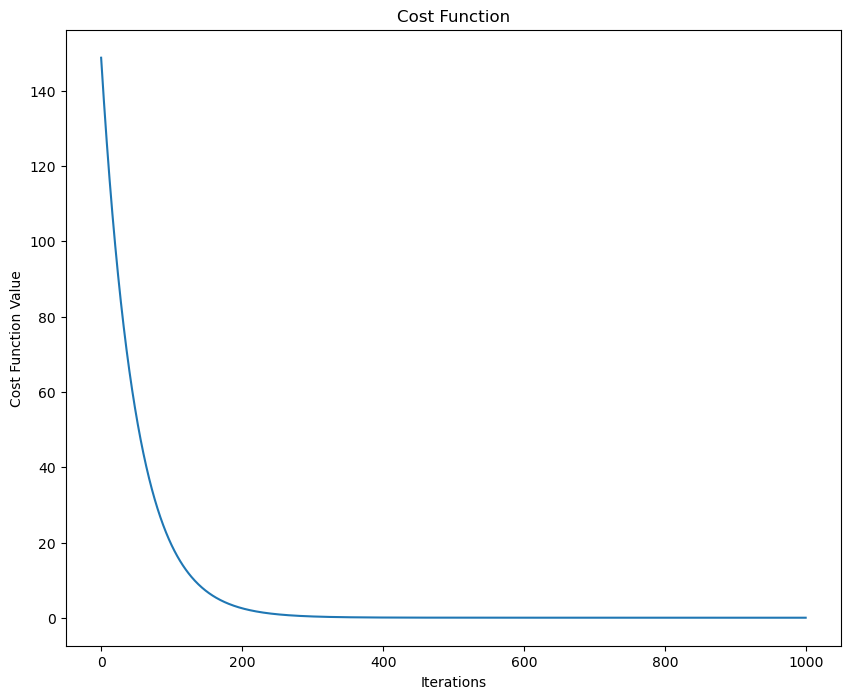

In [38]:
plotting(cost_history)

In [39]:
mae,mse,rmse,r2 = eval_metrics(y_test,y_pred)
print('MAE on Test set :',mae)
print('MSE on Test set :',mse)
print('RMSE on Test set :',rmse)
print('R2 Score on Test set :',r2)

MAE on Test set : 0.37708076314325106
MSE on Test set : 0.2190209191516675
RMSE on Test set : 0.4679967084837964
R2 Score on Test set : -1.4001775306846813


Plotting graphs to visualize categorical features in terms of cost

food_category :
['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous']


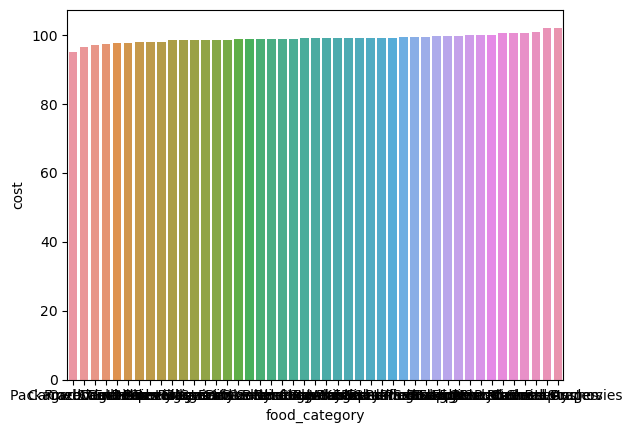

food_department :
['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eggs' 'Periodicals'
 'Breakfast Foods' 'Checkout' 'Carousel']


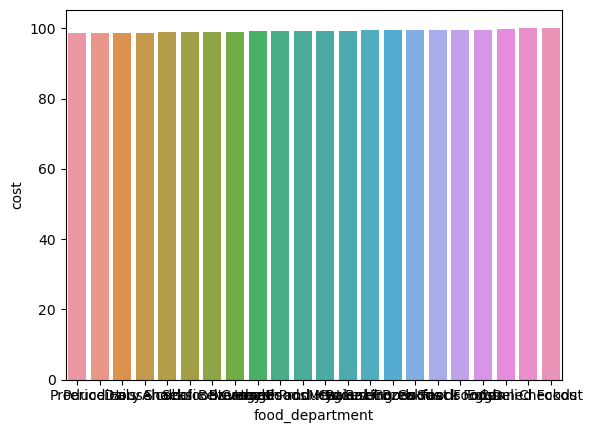

food_family :
['Food' 'Non-Consumable' 'Drink']


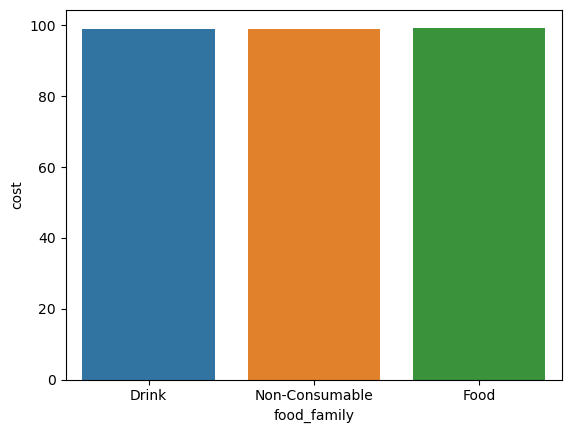

promotion_name :
['Bag Stuffers' 'Cash Register Lottery' 'High Roller Savings'
 'Double Down Sale' 'Green Light Days' 'Big Time Savings' 'Price Savers'
 'Price Slashers' 'Dollar Days' 'Two Day Sale' 'Super Duper Savers'
 'Weekend Markdown' 'Dollar Cutters' 'Sales Galore' 'Big Promo'
 'Free For All' 'Savings Galore' 'Unbeatable Price Savers'
 'Price Smashers' 'Shelf Clearing Days' 'Sales Days' 'Go For It'
 'Super Savers' 'Wallet Savers' 'Save-It Sale' 'Price Destroyers'
 'Two for One' 'Big Time Discounts' 'Shelf Emptiers' 'Bye Bye Baby'
 'One Day Sale' 'Fantastic Discounts' 'Saving Days' 'You Save Days'
 'Sale Winners' 'Coupon Spectacular' 'Three for One' 'Price Winners'
 'Dimes Off' 'I Cant Believe It Sale' 'Money Savers' 'Green Light Special'
 'Price Cutters' 'Tip Top Savings' 'Best Savings' 'Pick Your Savings'
 'Double Your Savings' 'Mystery Sale' 'Super Wallet Savers']


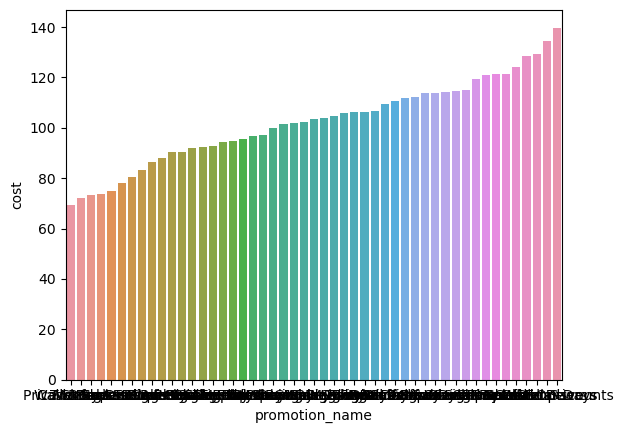

sales_country :
['USA' 'Mexico' 'Canada']


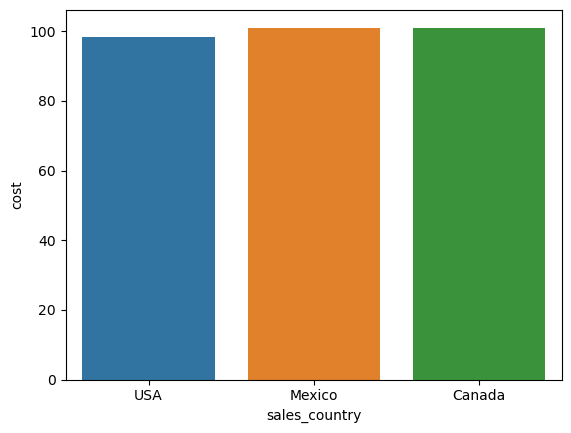

marital_status :
['M' 'S']


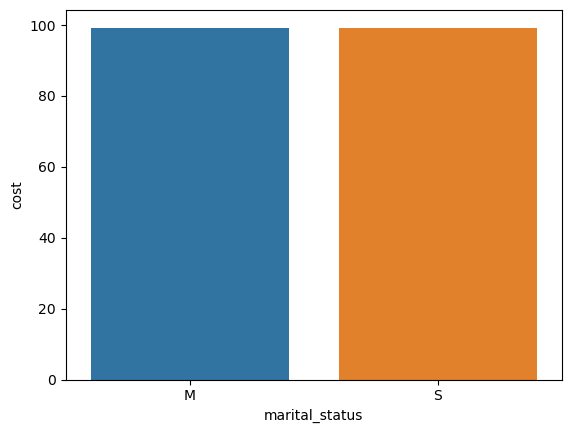

gender :
['F' 'M']


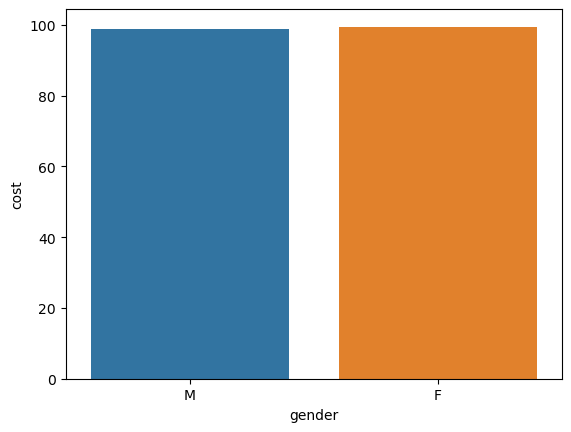

education :
['Partial High School' 'Bachelors Degree' 'High School Degree'
 'Graduate Degree' 'Partial College']


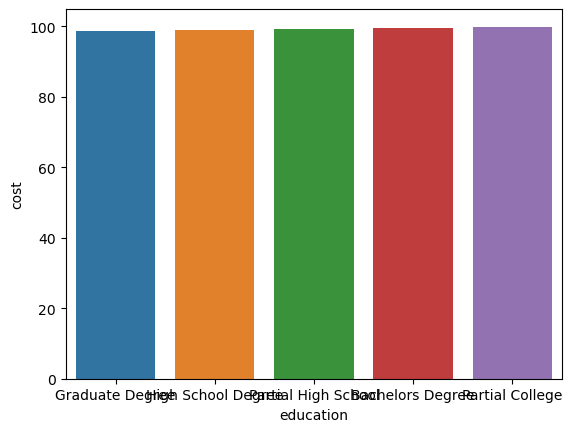

member_card :
['Normal' 'Silver' 'Bronze' 'Golden']


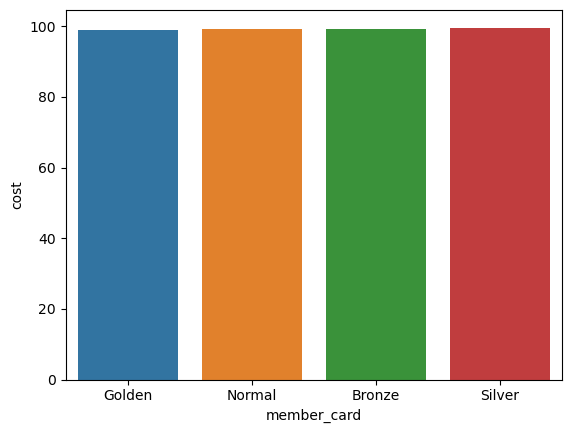

occupation :
['Skilled Manual' 'Professional' 'Manual' 'Management' 'Clerical']


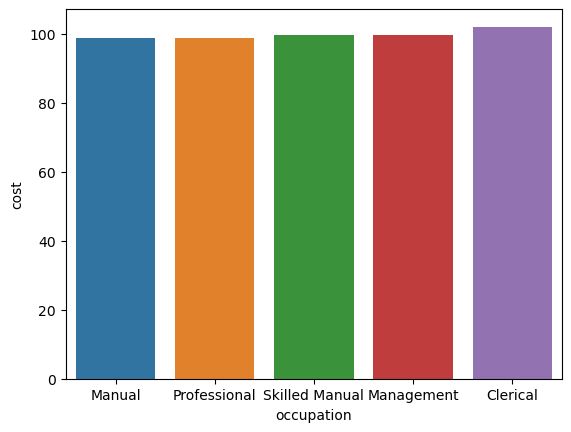

houseowner :
['Y' 'N']


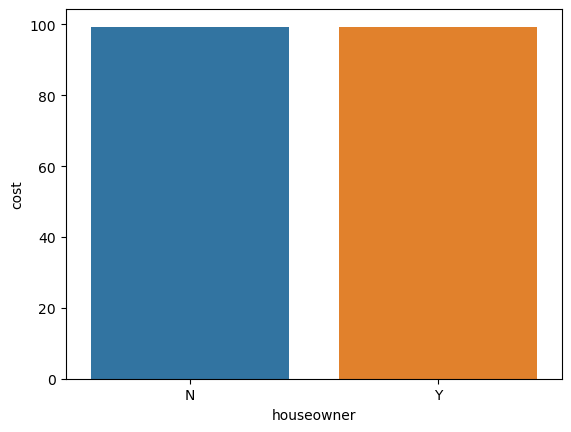

avg. yearly_income :
['$10K - $30K' '$50K - $70K' '$30K - $50K' '$70K - $90K' '$110K - $130K'
 '$130K - $150K' '$150K +' '$90K - $110K']


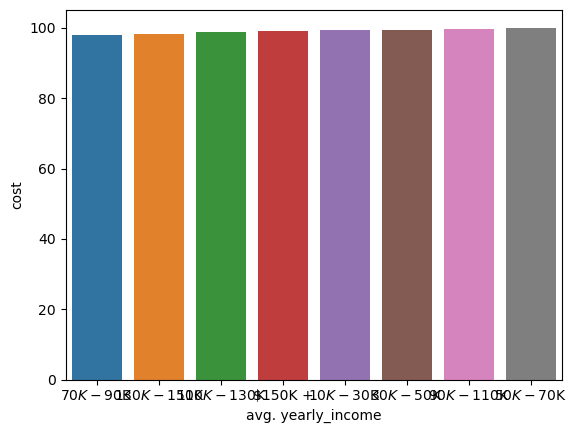

brand_name :
['Carrington' 'Golden' 'Imagine' 'Big Time' 'PigTail' 'Fantastic' 'Great'
 'Sphinx' 'Modell' 'Colony' 'Blue Label' 'Pleasant' 'Bravo' 'Better'
 'Just Right' 'Plato' 'BBB Best' 'Landslide' 'Super' 'CDR' 'High Top'
 'Tri-State' 'Hermanos' 'Tell Tale' 'Ebony' 'Thresher' 'Gulf Coast'
 'Musial' 'Atomic' 'Choice' 'Fort West' 'Nationeel' 'Horatio'
 'Best Choice' 'Fast' 'Gorilla' 'Carlson' 'Even Better' 'Club' 'Booker'
 'Shady Lake' 'Monarch' 'Discover' 'Colossal' 'Medalist' 'Jardon'
 'Cormorant' 'Sunset' 'Red Wing' 'High Quality' 'Denny' 'Faux Products'
 'Steady' 'Consolidated' 'Bird Call' 'Hilltop' 'Ship Shape' 'Footnote'
 'Genteel' 'Quick' 'Gerolli' 'Excellent' 'Fabulous' 'Token' 'Skinner'
 'Washington' 'Dual City' 'Kiwi' 'Tip Top' 'Amigo' 'Curlew' 'Moms'
 'Cutting Edge' 'Red Spade' 'Lake' 'American' 'Walrus' 'Pearl' 'Good'
 'Top Measure' 'Portsmouth' 'Toucan' 'Applause' 'Swell' 'Green Ribbon'
 'Big City' 'National' 'Blue Medal' 'Urban' 'Jumbo' 'Giant' 'Dollar'
 'Mighty Good' '

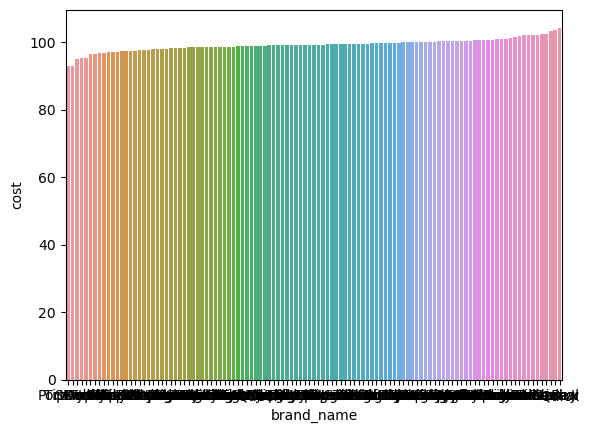

store_type :
['Deluxe Supermarket' 'Supermarket' 'Gourmet Supermarket' 'Small Grocery'
 'Mid-Size Grocery']


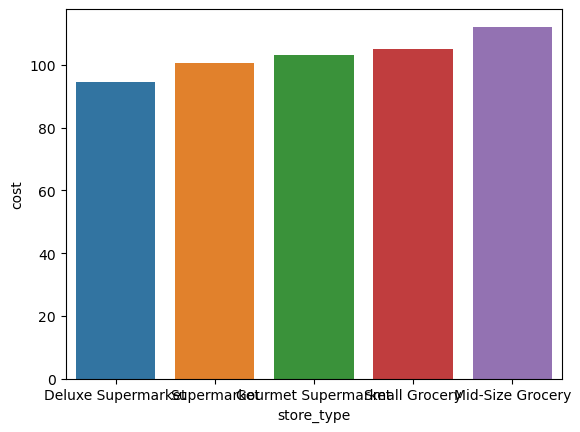

store_city :
['Salem' 'Tacoma' 'Seattle' 'Spokane' 'Los Angeles' 'Beverly Hills'
 'Portland' 'Bellingham' 'Orizaba' 'Merida' 'Hidalgo' 'Mexico City'
 'Vancouver' 'Bremerton' 'Camacho' 'Guadalajara' 'Acapulco'
 'San Francisco' 'Victoria']


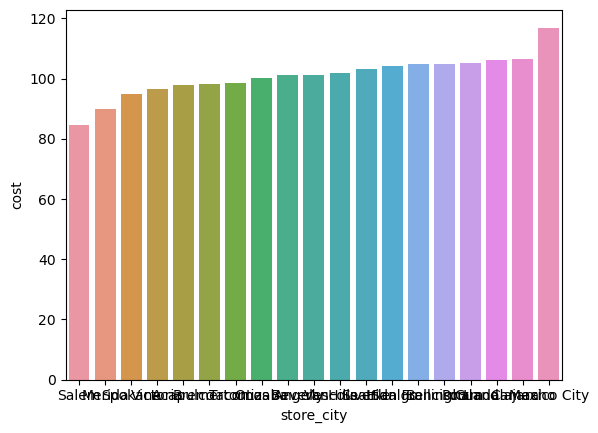

store_state :
['OR' 'WA' 'CA' 'Veracruz' 'Yucatan' 'Zacatecas' 'DF' 'BC' 'Jalisco'
 'Guerrero']


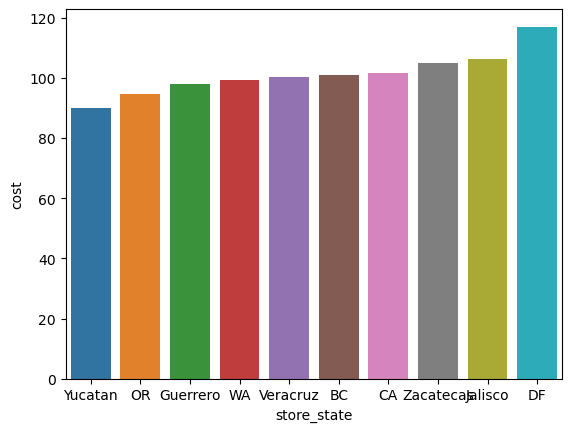

media_type :
['Daily Paper, Radio' 'In-Store Coupon' 'Radio' 'Daily Paper'
 'Product Attachment' 'Sunday Paper, Radio' 'Sunday Paper, Radio, TV'
 'Sunday Paper' 'Street Handout' 'TV' 'Bulk Mail' 'Cash Register Handout'
 'Daily Paper, Radio, TV']


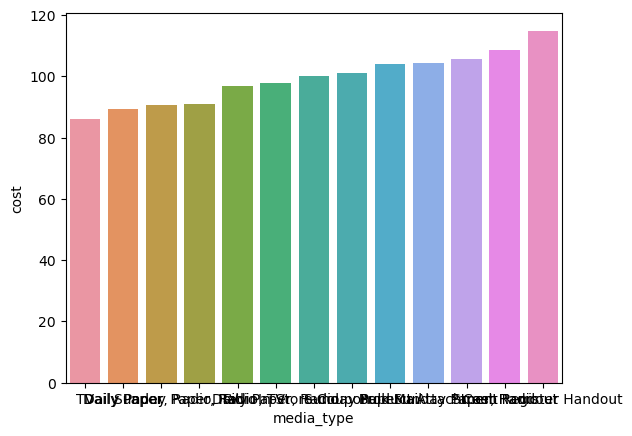

In [40]:
for col in dataset.select_dtypes('object').columns:
    print(col+" :")
    print(dataset[col].unique())
    sns.barplot(data=dataset.groupby(col).mean().sort_values("cost").reset_index(),x=col,y="cost")
    plt.show()

Feature Representation 5 : Removing unwanted features

In [41]:
X = encoder.fit_transform(dataset.drop(columns=['cost',"food_category","food_department","gender","food_family","marital_status","brand_name","avg. yearly_income","education","occupation","member_card","houseowner","sales_country"]))
y = dataset['cost']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [42]:
X_train,X_test,y_train,y_test = data_scaler(X_train,X_test,y_train,y_test)
X_train = np.column_stack(([1]*X_train.shape[0], X_train))# add a column with ones for the bias value while converting it into a matrix
X_test = np.column_stack(([1]*X_test.shape[0], X_test))
m,n = X_train.shape # rows and columns 
theta = np.array([1] * n) # initial theta
X = np.array(X_train) # convert X_train into a numpy matrix
y = y_train.flatten() # convert y into an array

alpha = 0.001 # alpha value 
iteration = 1000 # iterations

In [43]:
final_theta,cost_history = sgd(X,y,theta,iteration,alpha,m,n) #training model on feature representation 5

In [44]:
X_test = np.array(X_test)
y_pred = np.matmul(X_test,final_theta) #using learned theta to make predictions

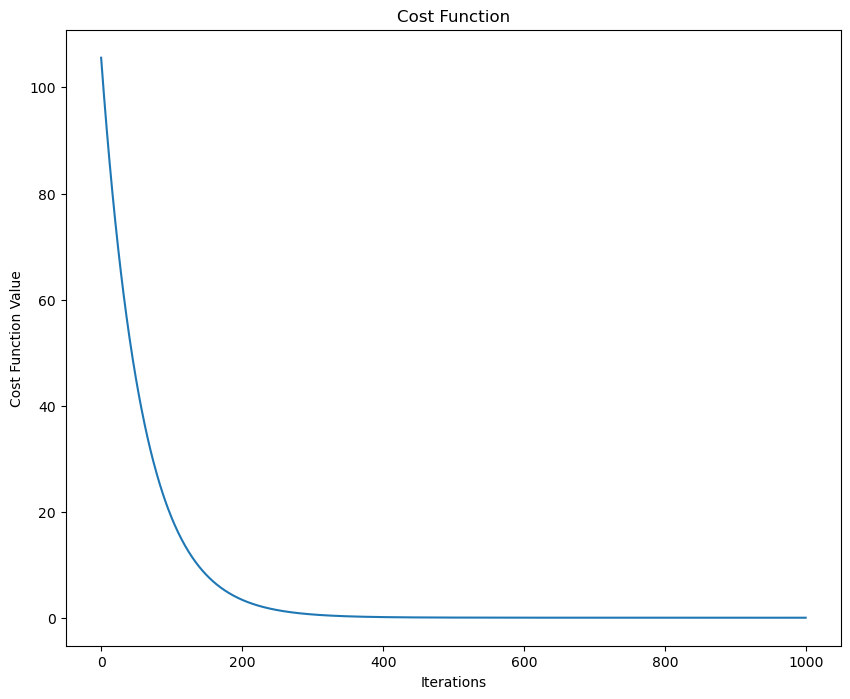

In [45]:
plotting(cost_history)

In [46]:
mae,mse,rmse,r2 = eval_metrics(y_test,y_pred)
print('MAE on Test set :',mae)
print('MSE on Test set :',mse)
print('RMSE on Test set :',rmse)
print('R2 Score on Test set :',r2)

MAE on Test set : 0.37240175758050303
MSE on Test set : 0.21303290294275742
RMSE on Test set : 0.461554875332021
R2 Score on Test set : -1.3321194353535395


Regularizations

In [47]:
X = encoder.fit_transform(dataset.drop(columns=['cost']))
y = dataset['cost']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [48]:
X_train,X_test,y_train,y_test = data_scaler(X_train,X_test,y_train,y_test)
X_train = np.column_stack(([1]*X_train.shape[0], X_train))# add a column with ones for the bias value while converting it into a matrix
X_test = np.column_stack(([1]*X_test.shape[0], X_test))
m,n = X_train.shape # rows and columns 
theta = np.array([1] * n) # initial theta
X = np.array(X_train) # convert X_train into a numpy matrix
y = y_train.flatten() # convert y into an array

alpha = 0.001 # alpha value 
iteration = 1000 # iterations
lam = 0.1

L1 Regularization

In [49]:
#l1 regularization
cost_l1 = []
theta_l1 = theta
for i in range(iteration):
    pred = np.matmul(X,theta_l1)
    J = 1/(2*m) * np.sum(np.square(pred - y)) + (lam*np.sum(np.abs(theta_l1))) #adding L1 penalty term to cost function
    cost_l1.append(J)
    d_theta_l1 = 1/m * np.dot(X.T, (pred-y)) + (lam * np.sign(theta_l1))
    theta_l1 = theta_l1 - alpha*d_theta_l1 #updating theta

In [50]:
X_test = np.array(X_test)
y_pred = np.matmul(X_test,theta_l1) #predicting cost

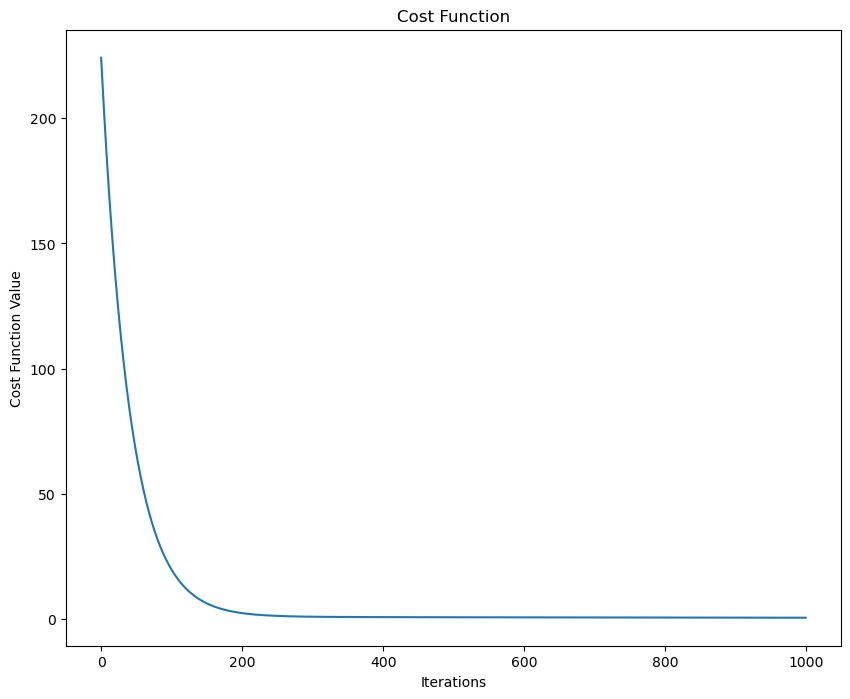

In [51]:
plotting(cost_l1)

In [52]:
mae,mse,rmse,r2 = eval_metrics(y_test,y_pred)
print('MAE on Test set :',mae)
print('MSE on Test set :',mse)
print('RMSE on Test set :',rmse)
print('R2 Score on Test set :',r2)

MAE on Test set : 0.35193097308252513
MSE on Test set : 0.18643656392081234
RMSE on Test set : 0.4317830055951859
R2 Score on Test set : -1.0124877376636996


In [53]:
X = encoder.fit_transform(dataset.drop(columns=['cost']))
y = dataset['cost']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [54]:
X_train,X_test,y_train,y_test = data_scaler(X_train,X_test,y_train,y_test)
X_train = np.column_stack(([1]*X_train.shape[0], X_train))# add a column with ones for the bias value while converting it into a matrix
X_test = np.column_stack(([1]*X_test.shape[0], X_test))
m,n = X_train.shape # rows and columns 
theta = np.array([1] * n) # initial theta
X = np.array(X_train) # convert X_train into a numpy matrix
y = y_train.flatten() # convert y into an array

alpha = 0.001 # alpha value 
iteration = 1000 # iterations
lam = 0.1

L2 Regularization

In [55]:
#l2 regularization
cost_l2 = []
theta_l2 = theta
for i in range(iteration):
    pred = np.matmul(X,theta_l2)
    J = 1/(2*m) * np.sum(np.square(pred-y)) + (lam*np.sum(np.square(theta_l2))) #adding L2 penalty term to cost function
    cost_l2.append(J)
    d_theta_l2 = 1/m * np.dot(X.T,(pred-y)) + (lam*2*theta_l2)
    theta_l2 = theta_l2 - alpha*d_theta_l2 #updating theta

In [56]:
X_test = np.array(X_test)
y_pred = np.matmul(X_test,theta_l2)

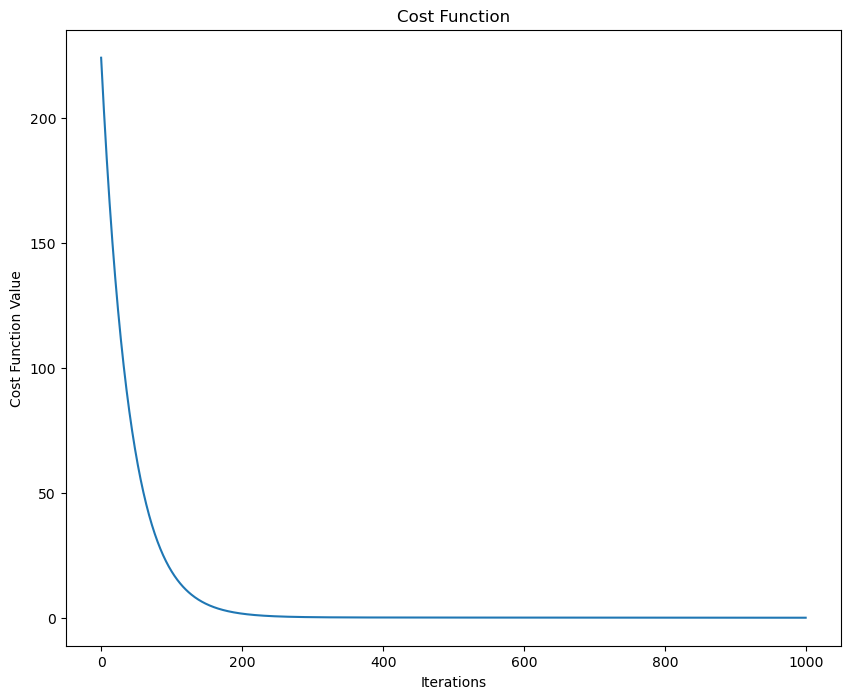

In [57]:
plotting(cost_l2)

In [58]:
mae,mse,rmse,r2 = eval_metrics(y_test,y_pred)
print('MAE on Test set :',mae)
print('MSE on Test set :',mse)
print('RMSE on Test set :',rmse)
print('R2 Score on Test set :',r2)

MAE on Test set : 0.35529316808873584
MSE on Test set : 0.19225120675678015
RMSE on Test set : 0.438464601486574
R2 Score on Test set : -1.0929150228540938


K-fold Cross Validation

In [88]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(dataset.drop(columns=['cost']))
Y = dataset['cost']
X = normalize(X)
X = np.column_stack(([1]*X.shape[0], X))
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.30)

In [89]:
#X = np.column_stack(([1]*X.shape[0], X))# add a column with ones for the bias value while converting it into a matrix
m,n = X.shape # rows and columns 
theta = np.array([1] * n) # initial theta
alpha = 0.001 # alpha value 
iteration = 1000 # iterations

In [90]:
# Spliting the dataset into KFolds
from sklearn.model_selection import KFold

# Shuffling happens before the split happens
kf = KFold(n_splits=10, shuffle = True, random_state = 1)

# Converting the np array to dataframe to perform further operations
X_df = pd.DataFrame(X)

k = 1
for train_set, test_set in kf.split(X=X_df):
    print("Iteration ", k)
    print(train_set, "Length of train_set:" , len(train_set))
    print(test_set, "Legnth of test:" , len(test_set))
    print("*"*100)
    k = k+1

Iteration  1
[    0     1     2 ... 60425 60426 60427] Length of train_set: 54385
[   10    28    30 ... 60352 60384 60390] Legnth of test: 6043
****************************************************************************************************
Iteration  2
[    0     1     2 ... 60425 60426 60427] Length of train_set: 54385
[   12    40    44 ... 60360 60381 60386] Legnth of test: 6043
****************************************************************************************************
Iteration  3
[    0     1     3 ... 60425 60426 60427] Length of train_set: 54385
[    2    23    25 ... 60407 60420 60422] Legnth of test: 6043
****************************************************************************************************
Iteration  4
[    0     1     2 ... 60425 60426 60427] Length of train_set: 54385
[    3     8    11 ... 60396 60423 60424] Legnth of test: 6043
****************************************************************************************************
Iteration  5
[  

In [91]:
from sklearn.metrics import  mean_absolute_error
import sklearn.metrics as metrics

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []
i = 1

#Iterating as many times as n_splits is defined
for train_set, test_set in kf.split(X):
    
    # Training the model with this splits' training dataset
    theta_k,cost_k = sgd(X_df.iloc[train_set].values, Y[train_set],theta,iteration,alpha,m,n)

    # Predicting cost values (Y values) with trained model along with metrics
    Y_pred = np.matmul(X_df.iloc[test_set].values,theta_k) 
    r2_sco = r2_score(Y[test_set], Y_pred)
    mse_sco = metrics.mean_squared_error(Y[test_set], Y_pred)
    mae_sco = metrics.mean_absolute_error(Y[test_set], Y_pred)
    rmse_sco = np.sqrt(metrics.mean_squared_error(Y[test_set], Y_pred))

    mae_scores.append(mae_sco)
    mse_scores.append(mse_sco)
    rmse_scores.append(rmse_sco)
    r2_scores.append(r2_sco)
    print("Iteration {0} completed".format(i))
    i = i +1


Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed
Iteration 6 completed
Iteration 7 completed
Iteration 8 completed
Iteration 9 completed
Iteration 10 completed


Plotting Error Bars

R2 score  : 0.30890952 (SD: 0.01543655)
RMSE score: 34.33109153 (SD: 0.22902948)
MSE score : 1178.6763001 (SD: 15.73050697)
MAE score : 28.66319914 (SD: 0.21002437)


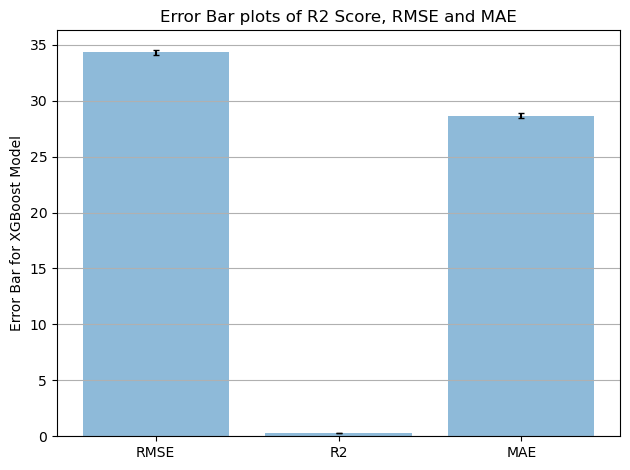

In [92]:
from numpy import absolute
scores_rmse = absolute(rmse_scores)
scores_mse = absolute(mse_scores)
scores_r2 = absolute(r2_scores)
scores_mae = absolute(mae_scores)
labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
CTEs = [absolute(scores_rmse.mean()), absolute(scores_r2.mean()), absolute(scores_mae.mean())]
error = [absolute(scores_rmse.std()), absolute(scores_r2.std()), absolute(scores_mae.std())]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=2)
ax.set_ylabel('Error Bar for XGBoost Model')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar plots of R2 Score, RMSE and MAE')
ax.yaxis.grid(True)

#Print metric values
print('R2 score  : %.8f (SD: %.8f)' % (scores_r2.mean(), scores_r2.std()) )
print('RMSE score: %.8f (SD: %.8f)' % (scores_rmse.mean(), scores_rmse.std()) )
print('MSE score : %.7f (SD: %.8f)' % (scores_mse.mean(), scores_mse.std()) )
print('MAE score : %.8f (SD: %.8f)' % (scores_mae.mean(), scores_mae.std()) )

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()